## 🔎 Exploratory analysis of the [Fake News Dataset](https://www.kaggle.com/datasets/algord/fake-news)

In [24]:
import pandas as pd

# https://www.kaggle.com/datasets/algord/fake-news
df = pd.read_csv("../datasets/FakeNewsNet.csv", sep=",")

### 🧾 Information about the dataset

In [25]:
df.head(5)

,title,news_url,source_domain,tweet_num,real
0,Kandi Burruss Explodes Over Rape Accusation on...,http://toofab.com/2017/05/08/real-housewives-a...,toofab.com,42,1
1,People's Choice Awards 2018: The best red carp...,https://www.today.com/style/see-people-s-choic...,www.today.com,0,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,https://www.etonline.com/news/220806_sophia_bu...,www.etonline.com,63,1
3,Colombian singer Maluma sparks rumours of inap...,https://www.dailymail.co.uk/news/article-33655...,www.dailymail.co.uk,20,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,https://www.zerchoo.com/entertainment/gossip-g...,www.zerchoo.com,38,1


In [26]:
print("Size:", df.shape)

Size: (23196, 5)


### 📃 Columns description in the dataset

In [27]:
!pip install Jinja2
descriptions = [
    "The title of the news article.",
    "The news URL of the article.",
    "the website from which the news article originates.",
    "Number of retweets the news article has received.",
    "The label indicating whether the news article is real (1) or fake (0)."
]
    
df_description = pd.DataFrame({
    "Column name": df.columns,
    "Description": descriptions
})

df_description.index = df_description.index + 1  # Start index at 1

df_description.style.set_table_styles([
    {'selector': 'th',
     'props': [('text-align', 'left')]},
    {'selector': 'td',
     'props': [('text-align', 'left')]}
])

,Column name,Description
1,title,The title of the news article.
2,news_url,The news URL of the article.
3,source_domain,the website from which the news article originates.
4,tweet_num,Number of retweets the news article has received.
5,real,The label indicating whether the news article is real (1) or fake (0).


### 📃 Check for missing values in the dataset

Let's check if there are any missing values in the dataset.

In [28]:
print(df.isnull().sum())

title              0
news_url         330
source_domain    330
tweet_num          0
real               0
dtype: int64


In [29]:
df = df.dropna()
print("Size after dropping rows containing at least one missing value:", df.shape)

Size after dropping rows containing at least one missing value: (22866, 5)


### 🧾 Number of true vs fake news

We can check the number of true vs fake news in the dataset, in order to see if the dataset is balanced or not.

In [30]:
real_news_count = df['real'].value_counts()[1]
fake_news_count = df['real'].value_counts()[0]
real_news_percent = (real_news_count / (real_news_count + fake_news_count)) * 100
fake_news_percent = (fake_news_count / (real_news_count + fake_news_count)) * 100
print("Number of real news articles:", real_news_count, "({:.2f}%)".format(real_news_percent))
print("Number of fake news articles:", fake_news_count, "({:.2f}%)".format(fake_news_percent))


Number of real news articles: 17371 (75.97%)
Number of fake news articles: 5495 (24.03%)


The difference between real and fake news articles is important. The dataset is not balanced.

Here a graphical representation of the number of true vs fake news articles.

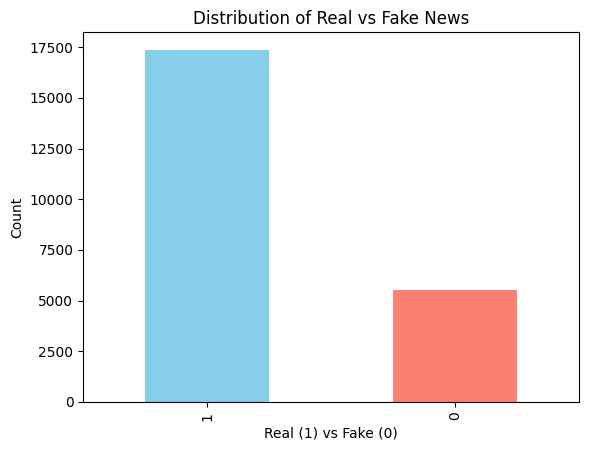

In [31]:
import matplotlib.pyplot as plt

df["real"].value_counts().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Distribution of Real vs Fake News")
plt.xlabel("Real (1) vs Fake (0)")
plt.ylabel("Count")
plt.show()

Let's now examine whether the veracity of a news is influenced by other variables. For example, let's compare the average number of retweets depending on whether the news is false or not.

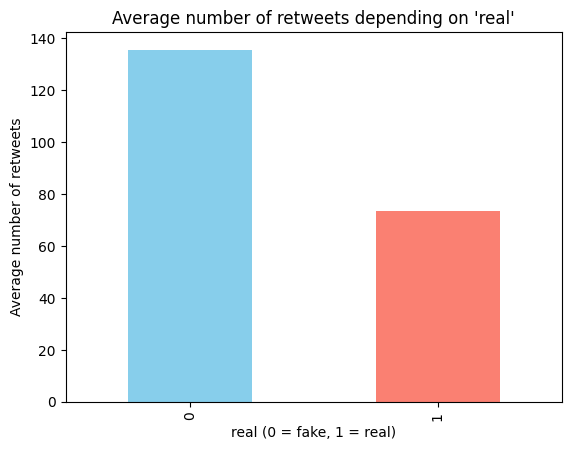

In [32]:
import matplotlib.pyplot as plt
import numpy as np

mean_retweets = df.groupby('real')['tweet_num'].mean().sort_index()

mean_retweets.plot(kind='bar', color=['skyblue', 'salmon'][:len(mean_retweets)])
plt.xlabel("real (0 = fake, 1 = real)")
plt.ylabel("Average number of retweets")
plt.title("Average number of retweets depending on 'real'")
plt.show()

This plot shows that the number of retweets is, on average, higher for real news.

### 📏 Analysis of title length distribution

Let's analyze the distribution of title lengths and see if there's any difference between real and fake news in terms of title length.

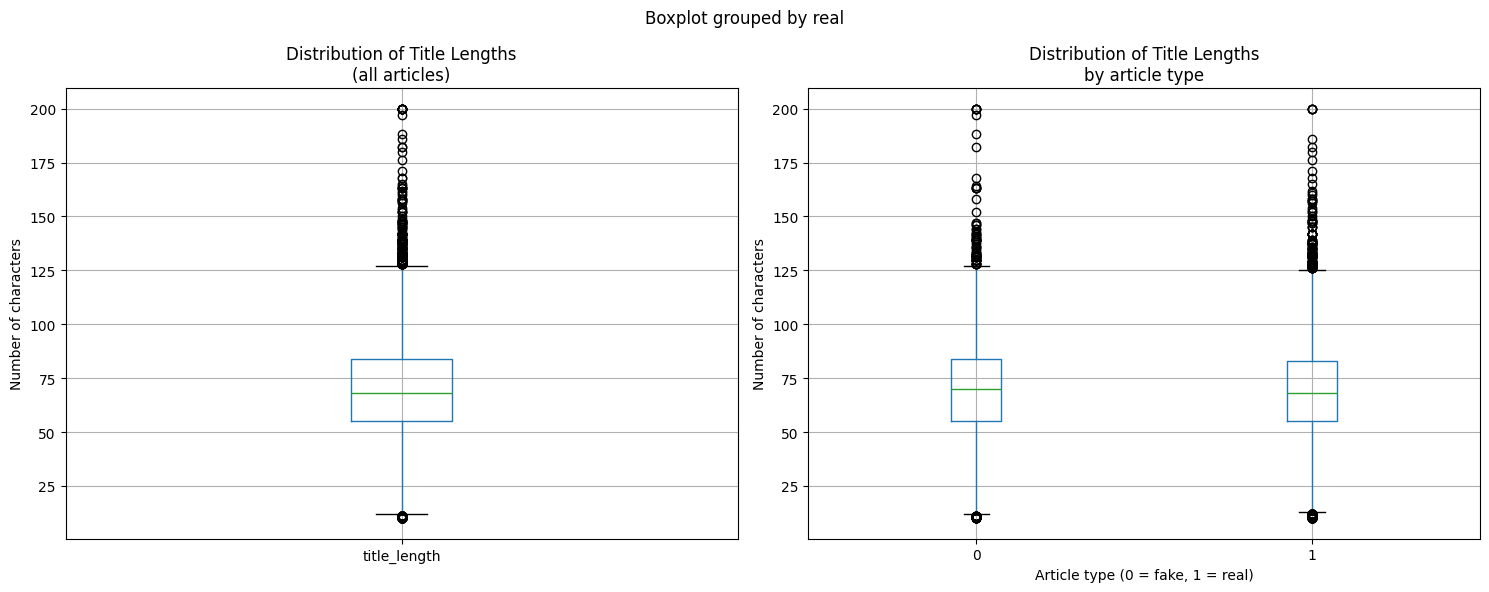


Descriptive statistics of title lengths by article type:
        count       mean        std   min   25%   50%   75%    max
real                                                              
0      5493.0  69.283634  23.820333  10.0  55.0  70.0  84.0  200.0
1     17364.0  68.140405  22.953388  10.0  55.0  68.0  83.0  200.0


In [23]:
df['title_length'] = df['title'].str.len()
df = df[df['title_length'] < 250]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df.boxplot(column='title_length', ax=ax1)
ax1.set_title('Distribution of Title Lengths\n(all articles)')
ax1.set_ylabel('Number of characters')

df.boxplot(column='title_length', by='real', ax=ax2)
ax2.set_title('Distribution of Title Lengths\nby article type')
ax2.set_xlabel("Article type (0 = fake, 1 = real)")
ax2.set_ylabel('Number of characters')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics of title lengths by article type:")
print(df.groupby('real')['title_length'].describe())

### 📏 Analysis of URL length distribution

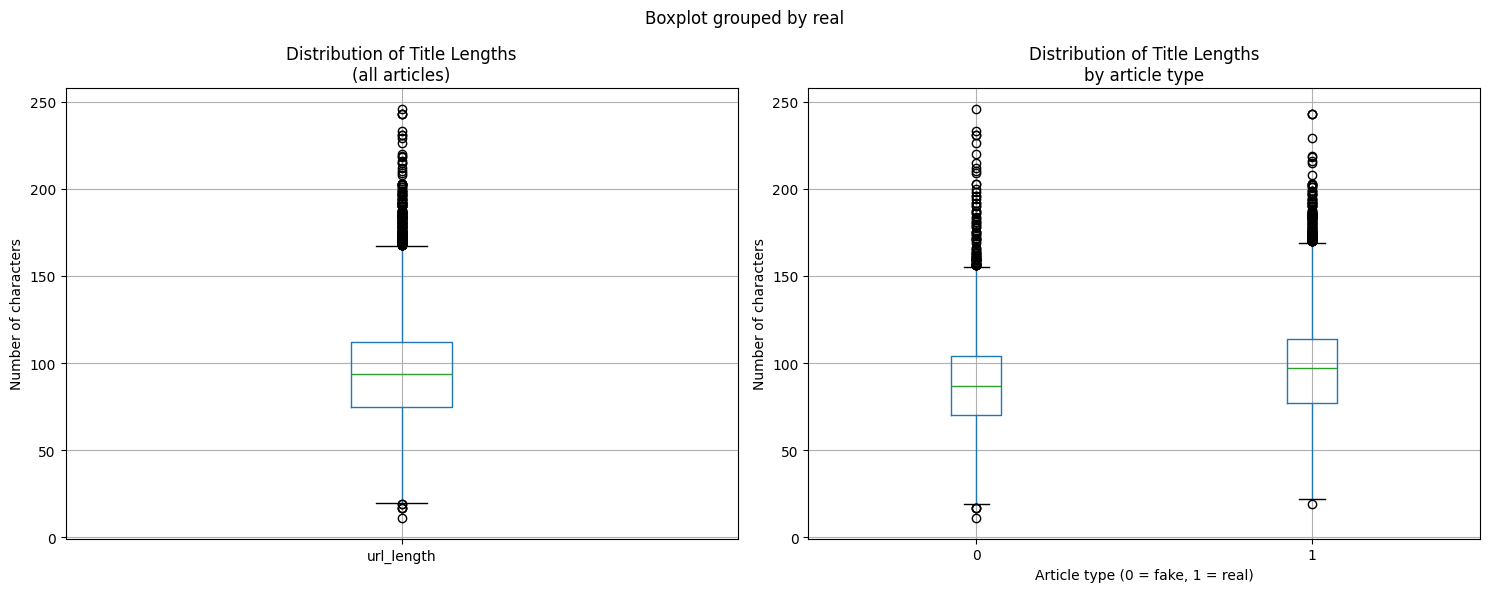


Descriptive statistics of title lengths by article type:
        count       mean        std   min   25%   50%    75%    max
real                                                               
0      5493.0  87.649372  28.855255  11.0  70.0  87.0  104.0  246.0
1     17365.0  96.480622  27.582173  19.0  77.0  97.0  114.0  243.0


In [33]:
df['url_length'] = df['news_url'].str.len()
df = df[df['url_length'] < 250]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

df.boxplot(column='url_length', ax=ax1)
ax1.set_title('Distribution of Title Lengths\n(all articles)')
ax1.set_ylabel('Number of characters')

df.boxplot(column='url_length', by='real', ax=ax2)
ax2.set_title('Distribution of Title Lengths\nby article type')
ax2.set_xlabel("Article type (0 = fake, 1 = real)")
ax2.set_ylabel('Number of characters')

plt.tight_layout()
plt.show()

print("\nDescriptive statistics of title lengths by article type:")
print(df.groupby('real')['url_length'].describe())

### Conclusion
In this notebook, we have explored the Fake-News--dataset. We have done following operations to clean/analyse the dataset:
- Removed missing values
- Check the numbers of Fake/True news
- Check the link with an another feature
- Check the distribution of Title and URL Lengths

The dataset is now ready to be used for the evaluation of the chatbots.